Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.

Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.
Iterate over each date in seven_days and in each iteration, print the .dayofweek and .weekday_name attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#rom datetime import datetime # To manually create dates

In [3]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7)
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
type(seven_days)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day)

6 <built-in method weekday of Timestamp object at 0x000001BCBD9D08C8>
0 <built-in method weekday of Timestamp object at 0x000001BCBD9D0548>
1 <built-in method weekday of Timestamp object at 0x000001BCBD9D05C8>
2 <built-in method weekday of Timestamp object at 0x000001BCBD9D0C48>
3 <built-in method weekday of Timestamp object at 0x000001BCBD9D0948>
4 <built-in method weekday of Timestamp object at 0x000001BCBD9D06C8>
5 <built-in method weekday of Timestamp object at 0x000001BCBD9D0CC8>


In [12]:
import calendar

list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [16]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, calendar.day_name[day.dayofweek])

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & resampling time series

### Create a time series of air quality data

You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().

In [3]:
data =pd.read_csv('../air_quality_data/nyc.csv')

# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


**Instructions**

* Inspect data using .info().
* Use pd.to_datetime to convert the column 'date' to dtype datetime64.
* Set the 'date' column as index.
* Validate the changes by inspecting data using .info() again.
* Plot data using subplots=True.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


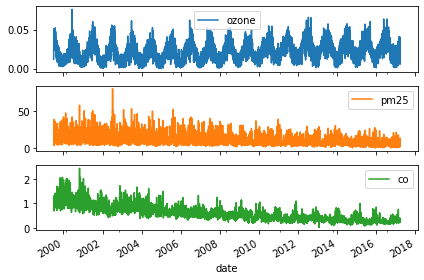

In [4]:
# Convert the date column to datetime64
data.date=pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.tight_layout()
plt.show()

## Compare annual stock price trends

In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [5]:
yahoo =pd.read_csv('../stock_data/yahoo.csv')
# Inspect data
print(yahoo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    782 non-null    object 
 1   price   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB
None


In [7]:
yahoo.date=pd.to_datetime(yahoo.date)
# Set date column as index
yahoo.set_index('date', inplace=True)
print(yahoo.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB
None


**Instructions**

We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

* Create an empty pd.DataFrame() called prices.
* Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
    * Use the iteration variable to select the data for this year and the column price.
    * Use .reset_index() with drop=True to remove the DatetimeIndex.
* Plot prices

<function matplotlib.pyplot.show(close=None, block=None)>

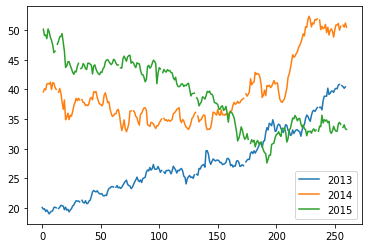

In [11]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show

## Set and change time series frequency

In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [15]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


## Set and change time series frequency

In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly

In [16]:
co =pd.read_csv('../air_quality_data/co_cities.csv')
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [18]:
print("Before setting index\n",co.info())
co.date=pd.to_datetime(co.date)
# Set date column as index
co.set_index('date', inplace=True)
print("After setting index \n",co.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB
Before setting index
 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
After setting index 
 None


**Instructions**

* Inspect co using .info().
* Use .asfreq() to set the frequency to calendar daily.
* Show a plot of 'co' using subplots=True.
* Change the the frequency to monthly using the alias 'M'.
* Show another plot of co using subplots=True.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


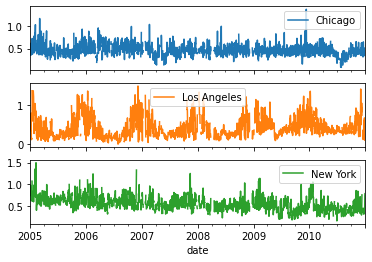

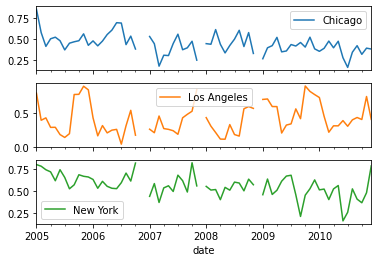

In [19]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()


# Lags, changes, and returns for stock price series

subtracting 1 and multiplying by 100

```python
google.change.sub(1).mul(100)
```

## Shifting stock prices across time

The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

**Instructions**
 
* Use pd.read_csv() to import 'google.csv', parsing the 'Date' as dates, setting the result as index and assigning to google.
* Use .asfreq() to set the frequency of google to business daily.
* Add new columns lagged and shifted to google that contain the Close shifted by 90 business days into past and future, respectively.
* Plot the three columns of google.

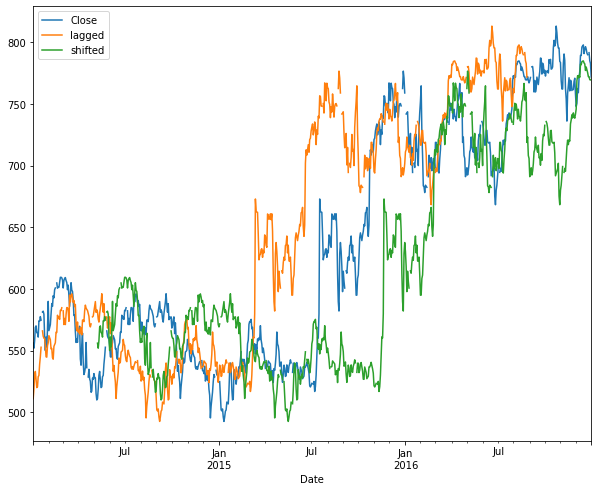

In [24]:
# Import data here
google = pd.read_csv('../stock_data/google.csv',parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(figsize=(10,8))
plt.show()


## Calculating stock price changes

You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [25]:
yahoo = yahoo.asfreq('B')

**Instructions**

We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo.

* Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
* Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
* Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
* Inspect the last five rows of yahoo to verify the calculation.
* Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.

In [26]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price']-yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['diff_30'].sub(yahoo['change_30']).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


There's usually more than one way to get to the same result when working with data.

## Plotting multi-period returns

The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

**Instructions**

We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

* Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
* Plot the result using subplots=True.

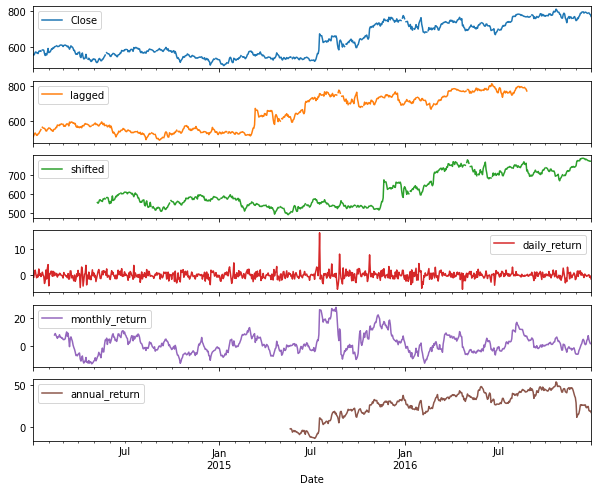

In [28]:
# Create daily_return
google['daily_return'] = google['Close'].pct_change(periods=1) * 100

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30) * 100

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360) * 100

# Plot the result
google.plot(subplots=True,figsize=(10,8))
plt.show()